In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

births=pd.read_csv(r'/home/shan/git_python_prac/data/births.csv')

births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


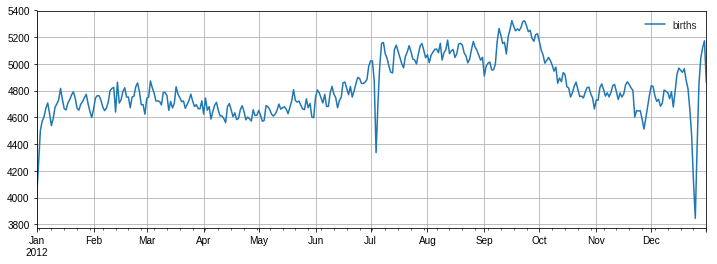

In [32]:
quartiles = np.percentile(births['births'], [25, 50, 75])
type(quartiles)

mu,sig=quartiles[1],0.74*(quartiles[2]-quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births['day'] = births['day'].astype(int)
births.index = pd.to_datetime(10000 * births.year +100 * births.month +births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',[births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]
fig, ax = plt.subplots(figsize=(12, 4))
plt.style.use('seaborn-whitegrid')
births_by_date.plot(ax=ax)

#births.head()

[Text(0,0.5,'average daily births'),
 Text(0.5,1,'USA births by day of year (1969-1988)')]

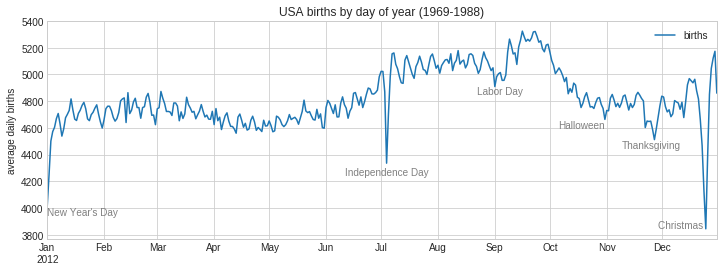

In [33]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

ax.set(title='USA births by day of year (1969-1988)',ylabel='average daily births')

In [9]:


##Example for percentile ..for quartile 
arr = [20, 50, 7, 1, 34] 
print("arr : ", arr)  
print("50th percentile of arr : ",  
       np.percentile(arr, 50)) 
print("25th percentile of arr : ", 
       np.percentile(arr, 25)) 
print("75th percentile of arr : ", 
       np.percentile(arr, 75)) 




('arr : ', [20, 50, 7, 1, 34])
('50th percentile of arr : ', 20.0)
('25th percentile of arr : ', 7.0)
('75th percentile of arr : ', 34.0)
